<a ><img src="https://qarlab.de/wp-content/uploads/2021/02/qar-lab_logo-web1.png"  width="120" align="right"> </a>

<a ><img src="https://milani.ch/assets/Logo/Trumpf-logo.svg"  width="90" align="left"> </a>


<br>
<br>
<br>
<br>
<br>
<br>
<br>

<h1><center>Quantum Annealing für Job Shop Scheduling </center></h1>



---
---
---

In [151]:
import sys
import random
import wikipedia
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pylab as plt
import plotly.figure_factory as ff


from dwave_qbsolv import QBSolv

from IPython.display import Markdown, display
wikipedia.set_lang("de") 
np.set_printoptions(threshold=sys.maxsize)

<h1>Inhaltsverzeichnis</h1>

<div class="alert alert-block alert-info" style="text-decoration:none; margin-top: 30px; background-color:#D3D3D3; border-color:#D3D3D3">
    <span style="color:#262626">
    <ol>
      <li><a href="#0"> <span style="color:#262626;text-decoration:none;" 
       >Über Trumpf  </span> </a></li>
          <ol>
      <li><a href="#1"> <span style="color:#262626;" 
       >Unternehmen  </span> </a></li>
       <li><a href="#2"> <span style="color:#262626;" 
       >Fokus: Blechfertigung  </span> </a></li>
       <li><a href="#3"> <span style="color:#262626;" 
       >Bisherige Versuche im Quantum Computing  </span> </a></li>
      <li><a href="#4"> <span style="color:#262626;" 
       >Das Problem für das QAR Lab </span> </a></li>
       <li><a href="#5"> <span style="color:#262626;" 
       >Die Daten  </span> </a></li>
       <li><a href="#6"> <span style="color:#262626;" 
       >Zusammenfassung  </span> </a></li>
        </ol>
        <li><a href="#7"> <span style="color:#262626;text-decoration:none;" 
       >Mathematische Formulierung des Problems </span> </a></li>
        <ol>
        <li><a href="#8"> <span style="color:#262626;" 
       >Zusammenfassung der Daten, die eine Lösung verkörpern  </span> </a></li>
       <li><a href="#9"> <span style="color:#262626;" 
       >Binäre Darstellung der Informationen   </span> </a></li>
      <li><a href="#10"> <span style="color:#262626;" 
       >Formulierung aller Nebenbedingungen als Strafterme  </span> </a></li>
      <li><a href="#11"> <span style="color:#262626;" 
       >Formulierung der Kostenfunktion und der QUBO-Matrix </span> </a></li>
       <li><a href="#12"> <span style="color:#262626;" 
       >Übersetzen der QUBO-Matrix in Ising Formalismus  </span> </a></li>
        </ol>
        <li><a href="#13"> <span style="color:#262626;" 
       >Umsetzung auf einem Quantum Annealer -- D Wave vs. Fujitsu </span> </a></li>
        <ol>
       <li><a href="#14"> <span style="color:#262626;" 
       >Hardware-Architektur: Chimera vs. Pegasus  </span> </a></li>
        <li><a href="#15"> <span style="color:#262626;" 
       >Wahl einer Annealing Schedule (Zeitübergangsfunktion)  </span> </a></li>
        <li><a href="#16"> <span style="color:#262626;" 
       >Erste Durchläufe auf einem Simulator  </span> </a></li>
        <li><a href="#17"> <span style="color:#262626;" 
       >Erste Ergebnisse auf echten Quantum Annealer  </span> </a></li>
       <li><a href="#18"> <span style="color:#262626;" 
       >Interpretation der Ergebnisse (durch mappen auf ursprüngliche QUBO)  </span> </a></li>
        </ol>
        <li><a href="#19"> <span style="color:#262626;" 
       >Ausblick </span> </a></li>     
        <ol>
        <li><a href="#20"> <span style="color:#262626;" 
       >Zusätzlicher Ansatz:  Scheduling als Strafterm und Integration des Knapsack Problems </span> </a></li>
       <li><a href="#21"> <span style="color:#262626;" 
       >Versuch mit reverse quantum annealing  </span> </a></li>
       </ol>
    </ol>
    </span>
</div>

---
---

## Über Trumpf <a id="0">

### Unternehmen  <a id="1">

In [152]:
display(Markdown(wikipedia.summary("Trumpf Gruppe")))

Die Trumpf-Gruppe (Eigenschreibweise: TRUMPF Gruppe) ist ein Unternehmen mit Hauptsitz in Ditzingen nahe Stuttgart. Trumpf gehört zu den weltweit größten Anbietern von Werkzeugmaschinen. Mit mehr als 70 operativen Tochtergesellschaften ist die Trumpf-Gruppe weltweit in allen wichtigen Märkten vertreten. Produktionsstandorte befinden sich in Deutschland, China, Frankreich, Großbritannien, Italien, Japan, Mexiko, Österreich, Polen, in der Schweiz, in Tschechien und in den USA.



### Blechfertigung  <a id="2">

In der flexiblen Blechfertigung werden kaum Großserienteile gefertigt, sondern eher kleinere Stückzahlen. Oftmals sind die Betriebe Lohnfertiger. Zuerst werden Rohbleche (Standardmaß 3000 x 1500 mm) mit einem trennenden Verfahren, oftmals Laserschneiden, in die zu produzierenden Teile geteilt. Da fertige Blechprodukte nur seltenen Fällen aus 2- dimensionalen Teilen bestehen, sind im Anschluss noch weitere Bearbeitungsverfahren notwendig. Im Folgenden soll die Betrachtung auf Biegen, Schweißen und Lackieren beschränkt werden. Um die Abhängigkeit der Bearbeitungsarten untereinander möglichst klein zu halten, kann ein Halbfertigteile-Lager zwischen den trennenden Verfahren und den weiteren Bearbeitungsschritten benutzt werden. Die Teile fließen dann ohne ein weiteres Lager durch diese Bearbeitungsstationen.

### Bisherige Verusche im Quantum Computing  <a id="3">

In der Blechfertigung gibt es viele komplexe Fragestellungen. Eine davon ist das „Nesting“ (deutsch: Schachteln). Hier geht darum, möglichst viele Teile aus einer Blechtafel herauszuschneiden und dabei Material zu sparen. Es gibt zwar schon Software für das Nesting, diese kann aber nur die Form der Teile berücksichtigen. Weitere wichtige Faktoren lässt sie außen vor, zum Beispiel die Teile so zu schneiden, dass sie nach dem Schneiden nicht umkippen. Deshalb schachteln die meisten Mitarbeiter von Hand. Wie bei einem Puzzle setzen sie die Teile auf die Blechtafel und greifen dabei immer wieder auf ihre persönlichen Tricks und Erfahrungen zurück. Würde ein Computer alle Faktoren berücksichtigen, müssten die Mitarbeiter Stunden oder gar Tage auf das Ergebnis warten. Er hat schlichtweg zu wenig Rechenleistung, um die perfekte Nesting-Lösung auf Knopfdruck zu liefern. Ein Quantencomputer könnte dies in kürzester Zeit lösen. Mitarbeiter müssten dann nicht länger puzzeln, um aus einer Blechplatte möglichst viele Teile herausschneiden zu können.

<img src="https://www.trumpf.com/filestorage/TRUMPF_Magazine/_processed_/0/e/csm_Schachtelung_3_dcdeb91f3f.jpg" alt="fishy" width="600px">

Beim „Nesting“ setzt der Mitarbeiter die Bauteile wie bei einem Puzzle virtuell am Computer auf die Blechplatte. Das Ziel ist es, so viele Teile wie nötig aus der Tafel herauszubekommen. Anschließend schneidet die Maschine mit einem Laser die Teile aus.

#### Aber auch auf den Zeitplan kommt es an
Ein weiterer Faktor, der das Nesting komplexer macht, ist das „Scheduling“. Hier gilt es, den idealen Zeitplan für die Fertigung zu erstellen. Wie dringend ist der Auftrag? Welche Maschinen sind gerade frei? Welches Material und welche Blechdicken benötigt der Kunde? All diese Anforderungen machen die Sache unlängst komplizierter. Zu kompliziert für heutige Computer.

### Das Job Shop Scheduling Problem für das QAR Lab <a id="4">

Nach dem Halbfertigteile-Lager entsteht in der Produktionsplanung ein Job Shop Scheduling Problem. Es muss eine Antwort auf die Frage gefunden werden, wann welches Teil auf welcher Maschine bearbeitet werden soll. Die Bearbeitungsstationen sind dabei in der Reihenfolge Biegen, Schweißen, Lackieren zu durchlaufen. Die Transportzeit der Teile zwischen den Stationen sowie die kurzzeitige Lagerung auf Logistikwägen soll vernachlässigt werden.

### Die Daten <a id="5">

Die Produktionszeit beginnt bei 0 und zählt diskret in Minuten aufwärts. Es gibt 3 Biegemaschinen und jede Biegelinie dauert 20 Sekunden. Es gibt außerdem 2 Schweißanlagen, die jeweils 30 Sekunden für einen Schweißpunkt brauchen. Die Angaben in den Daten sind als Anzahl der Biegelinien und Schweißpunkte zu verstehen. Da die Maschinen sich gleich verhalten, könnten sie auch zusammengefasst werden.
Die Fertigung hat außerdem eine Lackierzelle, deren Bearbeitungszeit für jedes Teil direkt in Minuten angegeben ist.
Im Beispieldatensatz ist jede Zeile als ein Teil zu verstehen. Jedes Teil gehört dabei zu einer Order, wobei eine Order aus mehreren Teilen bestehen kann. Diese haben dann dasselbe Fälligkeitsdatum.
Im JSSPDataGenerator.py finden Sie einen möglichen Generator für Beispieldaten. Wählen Sie die Bearbeitungszeiten so, dass bestimmte Stationen im Durchschnitt besonders voll bzw. alle Stationen sehr ausgeglichen ausgelastet sind, um verschiedene Szenarien zu simulieren.
Die Zielvariable ist eine möglichst geringe Summe an Verspätungen bzw. eine möglichst hohe Scheduling Efficiency.

In [153]:
# Data Generator for the Job Shop Scheduling Problem

# open file streams
file = open("OrdersGenerated.txt", "w")
file.write("OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate \n")

# Number of Orders
for i in range(0,15):

    noOfParts = 1+int(random.random()*3) # number of parts
    totalWelding = 0
    totalBending = 0
    totalPainting = 0
    resultArray = []

    for j in range(0,noOfParts):

        # BendingLines, every part has bending lines, unifrom distribution
        bendLines = 1 + int(random.random() * 8)

        # WeldingPoints, unifrom distribution
        weldPointsRnd = random.random()
        if weldPointsRnd < 0.15:
            weldPoints = 0
        else:
            weldPoints = 1 + int(random.random() * 14)

        # PaintTime        
        weldPointsRnd = random.random()
        if weldPointsRnd < 0.25:
            PaintTime = 0
        else:
            PaintTime = 3 + int(random.random() * 6)

        # Statistics
        totalBending = totalBending + bendLines
        totalWelding = totalWelding + weldPoints
        totalPainting = totalPainting + PaintTime

        # Save to file
        partResultArray = [str(i) + ", " + str(j) + ", " +  str(bendLines) + ", " + str(weldPoints) + ", " + str(PaintTime)]
        resultArray.append(partResultArray)
    
    # DueDate in mins from start
    bendingTime = totalBending/9     # 3 bending machines, 20 seconds per bend
    weldingTime = totalWelding/4     # 2 welding machines, 30 seconds per weld
    totalOrderTime = bendingTime + weldingTime + totalPainting
    jamFactor = 350
    dueDate = int(totalOrderTime) + int(random.random()*jamFactor) + 15 # 15 minutes buffer, choose jamFactor according to number of parts and average processing time

    for x in resultArray:
        file.write( x[0] + ", " + str(dueDate) + "\n")

file.close()
print("Fertig!")

Fertig!


### Zusammenfassung <a id="6">

- feste Sequenz in Reihenfolge Biegen > Schweißen > Lackieren
- Produktionszeit in Minuten $\in N_0 $
- 3 Biegemaschinen, jede Biegelinie dauert 20 Sekunden (In den Daten als Anzahl der Biegelinien)
- 2 Schweißanlagen, jeweils 30 Sekunden für einen Schweißpunkt (In den Daten als Anzahl der Schweißpunkte)
- 1 Lackierzelle, deren Bearbeitungszeit für jedes Teil direkt in Minuten angegeben ist.
- Zielvariable: möglichst geringe Summe an Verspätungen
- 3000 x 1500 mm Platz auf Blech --> Benötigte Größe der Teile als Weight $W$ im Knapsack Problem --> Genaueres bei Trumpf nachfragen

The job-shop scheduling problem (JSSP) is an important decision facing those involved in the fields of industry, economics and management. This problem is a class of combinational optimization problem known as the NP-hard problem. JSSPs deal with a set of machines and a set of jobs with various predetermined routes through the machines, where the objective is to assemble a schedule of jobs that minimizes certain criteria such as makespan, maximum lateness, and total weighted tardiness. Over the past several decades, interest in meta-heuristic approaches to address JSSPs has increased due to the ability of these approaches to generate solutions which are better than those generated from heuristics alone. This article provides the classification, constraints and objective functions imposed on JSSPs that are available in the literature.


<a ><img src="JSSP.png"  width="700" align="center"> </a>



The flexible JSSP is an extension of the crisp JSSP and it allows an operation to be processed by one machine out of a set of candidate machines. The problem consists of two sub- problems: assigning each operation to a machine (routing problem) and sequencing the assigned operations on the machines (sequencing problem), such that a feasible schedule optimization is achieved for given objectives. So, the flexible JSSP includes an extra problem; the assignment of operations to machines. The flexible JSSP has recently gained the attention of many researchers.

---

---

## Mathematische Formulierung <a id="7">

### Zusammenfassung der Daten um eine Lösung zu formulieren <a id="8">

$$
j \in J
$$
...

Legende TBD

+ von oben aber mathematisch formuliert

### Binäre Darstellung der Informationen <a id="9">

While there are several ways the JSP can be formulated, such as the rank-based formulation or the disjunctive formulation, our formulation is based on a straightforward time-indexed representation particularly amenable to quantum annealers. We assign a set of binary variables for each operation, corresponding to the various possible discrete starting times the operation can have:

$$
x_{o, m, t}=\left\{\begin{array}{ll}1 & : \text { operation } o \text { starts on machine } m \text {  at time } t \\ 0 & : \text { otherwise }\end{array}\right.
$$

Here $t$ is bounded from above by the timespan $T$, which represents the maximum time we allow for the jobs to complete. The timespan itself is bounded from above by the total work of the problem, that is, the sum of the execution times of all operations.

### Formulierung aller Nebenbedingungen als Strafterme <a id="10">



The optimization problem is limited by three constraints. Firstly, each operation must be started once and only once on some capable machine:


<br />


$$
H_{0}:=\sum_{o \in 0}\left(\sum_{m \in M_{o}} \sum_{t=0}^{T-1} x_{o, m, t}-1\right)^{2}
$$


<br />
<br />

Secondly, for every job $j \in J$, its operations $O_j$ must be executed in the order given by 

<br /><br />
$$
\left.c\right|_{o_{j}}: O_{j} \rightarrow\left\{1, \ldots, n_{j}\right\}
$$
<br />
$$H_{1}:=\sum_{j \in J}\left(\sum_{k_{n-1}<i<k_{n}, t+p_{i} > t'} x_{i, t}x_{i+1, t'}\right)$$

<br /><br />



In addition, only one operation can be executed simultaneously on a single machine at a certain point in time. Analogously to above, for any $m \in M$ a set $R_m$ of violating index combinations for machine $m$ is defined as


$$H_{2}:= \sum_{m \in M}\left(\sum_{i,t,k,t'\in R_m} x_{i,t}x_{k,t'}\right)$$ 
with $$R_m=A_m \cup B_m$$

$$A_m= \{(i,t,k,t'): (i,k) \in I_m \times I_m, i \neq k, 0 \leq t, t' \leq T,0 <t'-t< p_i\} $$
$$B_m= \{(i,t,k,t'): (i,k) \in I_m \times I_m, i < k, t' = t, p_i > 0, p_j >0\} $$

The set $A_m$ is defined so that the constraint forbids operation $O_j$ from starting at $t′$ if there is another operation $O_i$ still running, which happens if $O_i$ started at time $t$ and $t′ −t$ is less than $p_i$. The set $B_m$ is defined so that two jobs cannot start at the same time, unless at least one of them has an execution time equal to zero.

### Formulierung der Kostenfunktion und der QUBO-Matrix <a id="11">


The polynomials $H_0 , H_1, H_2$ only consist of combinatorial constraints, however the optimization target is to minimize ( the number of) delays. With the notion of predecessor and successor times, a binary polynomial can be defined that penalizes late starting times of operations that could in theory have already started.


For job  $ j \in J $ define the "done"-time $t{j}^{}$ as

$$
t_{\text {j Done}}=\sum_{t=0}^{T}\left( x_{o*, m, t} \cdot t\right)+d_{o*, m}
$$

where $ o*$ is the last Operation of the job $ j$


Then the cost function $f$  to minimize is

$$f = \sum_{j \in J}\left(1+\operatorname{sgn}\left(t_{j}^{*}-t_{j, deadline}\right)\right)\left(t_{j}^{*}-t_{j, deadline}\right)$$



Then the optimization objective $H$ can be set as


$H:=\alpha H_{0}+\beta H_{1}+\gamma H_{2}+\delta f$
with scalar weights $\alpha, \beta, \gamma, \delta \in \mathbb{R}{>0}$

### Übersetzen der QUBO-Matrix in Python <a id="12">


In [154]:
d = {'OrderNo' : [], 'PartNo' : [], 'BendingLines' : [], 'WeldingPoints' : [], 'PaintTime' : [], 'DueDate' : []}
orderDF = pd.DataFrame(data=d)
jobs = []
path = r"OrdersGenerated.txt"
orders = open(path, "r")
orders = orders.readlines()
orders = orders[1:]
for i in range(len(orders)):
    orders[i] = orders[i].split(', ')
    actualOrder = orders[i]
    newjob = tuple((int(actualOrder[0]),int(actualOrder[1]),int(actualOrder[2]),int(actualOrder[3]),int(0),int(actualOrder[5])))
    jobs.append(newjob)
    newRow = {'OrderNo' : actualOrder[0], 
              'PartNo' : actualOrder[1], 
              'BendingLines' : actualOrder[2], 
              'WeldingPoints' : actualOrder[3], 
              'PaintTime' : actualOrder[4], 
              'DueDate' : actualOrder[5]}
    orderDF = orderDF.append(newRow, ignore_index = True)    

orderDF = orderDF.astype('int64')

#for simplicity the following lines:
orderDF = orderDF.iloc[0:3][:]

print (jobs)

[(0, 0, 2, 2, 0, 83), (1, 0, 5, 11, 0, 213), (1, 1, 4, 7, 0, 213), (2, 0, 5, 0, 0, 244), (2, 1, 8, 11, 0, 244), (3, 0, 4, 11, 0, 339), (3, 1, 1, 1, 0, 339), (3, 2, 4, 11, 0, 339), (4, 0, 8, 8, 0, 315), (4, 1, 2, 4, 0, 315), (5, 0, 2, 3, 0, 178), (5, 1, 7, 3, 0, 178), (5, 2, 2, 8, 0, 178), (6, 0, 1, 9, 0, 240), (6, 1, 2, 6, 0, 240), (6, 2, 5, 5, 0, 240), (7, 0, 3, 1, 0, 299), (8, 0, 3, 7, 0, 238), (9, 0, 2, 5, 0, 202), (9, 1, 6, 14, 0, 202), (9, 2, 4, 10, 0, 202), (10, 0, 7, 14, 0, 334), (10, 1, 2, 10, 0, 334), (10, 2, 3, 3, 0, 334), (11, 0, 1, 13, 0, 129), (11, 1, 8, 13, 0, 129), (12, 0, 3, 10, 0, 243), (12, 1, 3, 11, 0, 243), (12, 2, 2, 5, 0, 243), (13, 0, 8, 9, 0, 239), (14, 0, 7, 12, 0, 280)]


##### Aber zu Beginn fangen wir mit einem leichteren Beispiel an:

In [156]:
jobs = [(0, 0, 1, 1, 0, 3), (0, 1, 1, 0, 0, 3), (0, 2, 1, 0, 0, 3), (0, 3, 0, 1, 1, 3)] 

In [157]:
bend = [0, 1, 2]
solder = [3, 4]
paint =  [5]

bend_dauer = 2
weld_dauer = 3
paint_dauer = 6
t_step = 6

In [158]:
def max_time(jobs):
    t = 0
    for x in jobs:
        t += x[2] * bend_dauer + x[3] * weld_dauer + x[4] * paint_dauer
    return t

In [159]:
# OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate 
m_time = max_time(jobs)

m_t_steps = int(m_time / t_step)
    
print('The maximal maketime for the given operations is: ' + str(m_time) + ' second(s).\nWhich is equal to: ' + str(m_t_steps) + ' time steps.\n\n')


The maximal maketime for the given operations is: 18 second(s).
Which is equal to: 3 time steps.




##### Ops method to only create logical combinations --> less pruning in the end

In [160]:
# original
def ops(jobs, bend, solder, paint, m_time):
    ops = []
    for x in jobs:
        if x[2] > 0:
            a = 1
            while a <= x[2]:
                for m in bend:
                    t = 0
                    punish = 0
                    if x[3] > 0:
                        punish += x[3] * 3
                    while t < m_time - punish:
                        ops.append(tuple((x[0], x[1], a, m, t)))
                        t += t_step
                a += 1
        if x[3] > 0:
            b = 1
            while b <= x[3]:
                for m in solder:
                    t = 0
                    if x[2] > 0:
                        t += x[2] * 2
                    while t < m_time:
                        ops.append(tuple((x[0], x[1], b, m, t)))
                        t += t_step
                b += 1
        if x[4] > 0:
            for m in paint:
                t = 0
                while t < m_time:
                    ops.append(tuple((x[0], x[1], 1, m, t)))
                    t += t_step
        # ops.append(('||||||||||||END OF JOB ' + str(x[0]) + ' OPERATION ' + str(x[1]) + '||||||||||||'))
    return ops
    
ops = ops(jobs, bend, solder, paint, m_time)

print('Anzahl an Kombinationen: ' + str(len(ops)) + '\n')

print('Possible combiniations:\n')
print('Format: OrderNo, PartNo, Op, Machine, Time')

print(ops)

Anzahl an Kombinationen: 42

Possible combiniations:

Format: OrderNo, PartNo, Op, Machine, Time
[(0, 0, 1, 0, 0), (0, 0, 1, 0, 6), (0, 0, 1, 0, 12), (0, 0, 1, 1, 0), (0, 0, 1, 1, 6), (0, 0, 1, 1, 12), (0, 0, 1, 2, 0), (0, 0, 1, 2, 6), (0, 0, 1, 2, 12), (0, 0, 1, 3, 2), (0, 0, 1, 3, 8), (0, 0, 1, 3, 14), (0, 0, 1, 4, 2), (0, 0, 1, 4, 8), (0, 0, 1, 4, 14), (0, 1, 1, 0, 0), (0, 1, 1, 0, 6), (0, 1, 1, 0, 12), (0, 1, 1, 1, 0), (0, 1, 1, 1, 6), (0, 1, 1, 1, 12), (0, 1, 1, 2, 0), (0, 1, 1, 2, 6), (0, 1, 1, 2, 12), (0, 2, 1, 0, 0), (0, 2, 1, 0, 6), (0, 2, 1, 0, 12), (0, 2, 1, 1, 0), (0, 2, 1, 1, 6), (0, 2, 1, 1, 12), (0, 2, 1, 2, 0), (0, 2, 1, 2, 6), (0, 2, 1, 2, 12), (0, 3, 1, 3, 0), (0, 3, 1, 3, 6), (0, 3, 1, 3, 12), (0, 3, 1, 4, 0), (0, 3, 1, 4, 6), (0, 3, 1, 4, 12), (0, 3, 1, 5, 0), (0, 3, 1, 5, 6), (0, 3, 1, 5, 12)]


In [161]:
def convert(ord1, part1, op1, mach1, t1):
    return ops.index(tuple((ord1, part1, op1, mach1, t1)))

In [163]:
QUBO = np.zeros((len(ops), len(ops))).astype(int)
np.set_printoptions(suppress=True)

In [164]:
#Format: OrderNo, PartNo, Op, Machine, Time 
    
def fill_QUBO_with_indexes(QUBO, ord1, part1, op1, mach1, t1, ord2, part2, op2, mach2, t2, value):
    index_a = convert(ord1, part1, op1, mach1, t1)
    index_b = convert(ord2, part2, op2, mach2, t2)
    if index_a > index_b:
        index_a, index_b = index_b, index_a
    QUBO[index_a][index_b] += value

Constraint 1 (each operation 'o' of each job 'j' exactly once on one machine 'm' at a certaint (starting-)time 't'):

$$
H_{0}:=\sum_{o \in 0}\left(\sum_{m \in M_{o}} \sum_{t=0}^{T-1} x_{j, o, m, t}-1\right)^{2}
$$


In [165]:
# H0: Mehrmaliges abarbeiten der selben Operation eines Bauteils eines Jobs bestrafen

alpha = 1

for x in jobs:
        if x[2] > 0:
                for m in bend:
                    for u in range(m_time):
                        for t in range(u):
                            fill_QUBO_with_indexes(QUBO, x[0], x[1], x[2], m, t, x[0], x[1], x[2], m, u, 2*alpha)
                        for t in range(m_time):
                            fill_QUBO_with_indexes(QUBO, x[0], x[1], x[2], m, t, x[0], x[1], x[2], m, t, -alpha)
        if x[3] > 0:
                for m in solder:
                    for u in range(m_time):
                        for t in range(u):
                            fill_QUBO_with_indexes(QUBO, x[0], x[1], x[3], m, t, x[0], x[1], x[3], m, u, 2*alpha)
                        for t in range(m_time):
                            fill_QUBO_with_indexes(QUBO, x[0], x[1], x[3], m, t, x[0], x[1], x[3], m, t, -alpha)

ValueError: (0, 0, 1, 0, 1) is not in list

Secondly, for every job $j \in J$, its operations $O_j$ must be executed in the order given by 

<br /><br />
$$
\left.c\right|_{o_{j}}: O_{j} \rightarrow\left\{1, \ldots, n_{j}\right\}
$$
<br />
$$H_{1}:=\sum_{j \in J}\left(\sum_{k_{n-1}<i<k_{n}, t+p_{i} > t'} x_{i, t}x_{i+1, t'}\right)$$


In [166]:
'Format: OrderNo, PartNo, Op, Machine, Time \n'
# H1 verbotene Reihenfolgen innerhalb eines Bauteils eines Jobs bestrafen

beta = 1

for tupel1 in ops:
    if tupel1[3] <= 3:
        dom = 2
    elif tupel1[3] <= 5:
        dom = 3
    else:
        dom = 0
    for tupel2 in ops:
        if (tupel1[0] == tupel2[0]) and (tupel1[1] == tupel2[1]):
            if (tupel2[3] > 2 and 2 >= tupel1[3] and tupel2[4] < (tupel1[4] + dom)) or (tupel2[3] > 4 and 4 >= tupel1[3] and tupel1[3] > 2 and tupel2[4] < (tupel1[4] + dom)):
                fill_QUBO_with_indexes(QUBO, *tupel1, *tupel2, beta)

In [167]:
'Format: OrderNo, PartNo, Op, Machine, Time \n'
# H2 Geichzeitiges Laufen zweier verschiedener Operationen auf der selben Ma

gamma = 1

for tupel1 in ops:
    if tupel1[3] <= 3:
        dom = 2
    elif tupel1[3] <= 5:
        dom = 3
    else:
        dom = 0
    for tupel2 in ops:
        if ((tupel1[0] != tupel2[0] or tupel1[1] != tupel2[1]) and tupel1[3] == tupel2[3] and tupel1[4] <= tupel2[4] < tupel1[4] + dom):
            fill_QUBO_with_indexes(QUBO, *tupel1, *tupel2, gamma)

In [168]:
# ops =  OrderNo, PartNo, OpNum, Machine, Time
# job = OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate
# K Bestrafung für Verspätung

delta = 1
     
c = 0
while c < len(jobs):
    t1 = 0
    while t1 < len(ops):
        if jobs[c][0] == ops[t1][0]:
            tail = 0
            punish = 0
            if ops[t1][3] < 3: # op is bend
                dom = 2 * ops[t1][2]
                if jobs[c][3] > 0: # there is still welding to do
                    tail += jobs[c][3] * 3
                if jobs[c][4] > 0: # has paint op
                    punish += jobs[c][4] * 6
            else: # op is weld
                dom = 3 * ops[t1][2]
                if jobs[c][4] > 0: # has paint op
                    punish += jobs[c][4] * 6
            if ops[t1][4] + dom + tail > jobs[c][5]*6 - punish:
                fill_QUBO_with_indexes(QUBO, *ops[t1], *ops[t1], delta)
        t1 += 1
    c+=1

In [170]:
qubo_d = {}
x1 = 0
while x1 < len(ops):
    x2 = x1
    while x2 < len(ops):
        qubo_d[(x1, x2)] = QUBO[x1][x2]
        x2 += 1
    x1 += 1
    
# print(qubo_d)

In [171]:


# verwendet ops! --> als zusätzliches Argument?
def get_qubo_heatmap(QUBO, output="qubo_matrix.png"):
    
    df = pd.DataFrame(QUBO, columns=ops, index = ops)
    sns.set_style("white")
    mask = np.tril(np.zeros_like(df)).astype(np.bool)
    mask[np.tril_indices_from(mask)] = True

    # Keep diagonal elements 
    mask[np.diag_indices_from(mask)] = False

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(14, 12))

    # Generate a custom diverging colormap in TRUMPF Color 0033BA
    cmap = sns.diverging_palette(255, 200, sep=10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns_plot = sns.heatmap(df, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    # save to file
    fig = sns_plot.get_figure()
    fig.savefig(output)

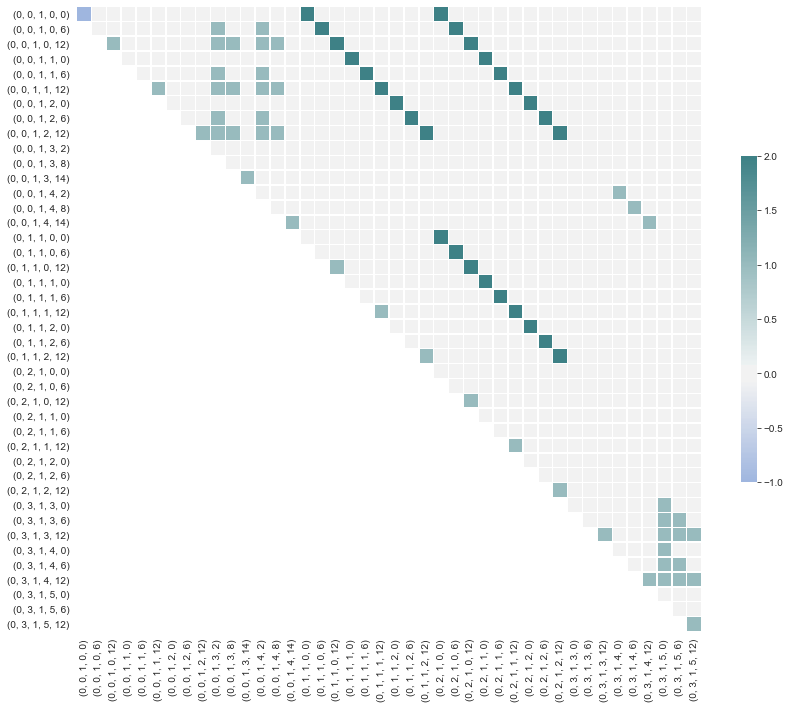

In [172]:
get_qubo_heatmap(QUBO)

In [174]:
qubo_d = {}
x1 = 0
while x1 < len(ops):
    x2 = x1
    while x2 < len(ops):
        qubo_d[(x1, x2)] = QUBO[x1][x2]
        x2 += 1
    x1 += 1

#print(qubo_d)

In [175]:
# solve and print first result
result = QBSolv().sample_qubo(qubo_d)
print(result)
result = [result.samples()[0][x] for x in result.samples()[0]]
schedule = []
for i in range(len(result)):
    if result[i] == 1:
        schedule.append(ops[i])
df_schedule=pd.DataFrame(schedule)
df_schedule.columns = ["OrderNo", "PartNo", "Op", "Task", "Time"]

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 ... 41 energy num_oc.
0   1  1  0  0  0  0  0  1  0  0  1  0  0  1  0  0  0  0 ...  0   -1.0       2
1   1  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0 ...  0   -1.0       2
2   1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0 ...  0   -1.0       2
3   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0   -1.0       9
4   1  0  0  1  0  0  0  0  0  1  1  0  1  0  0  0  1  0 ...  0   -1.0       2
5   1  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0 ...  0   -1.0       2
6   1  1  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0 ...  0   -1.0       1
7   1  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0 ...  0   -1.0       2
8   1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0   -1.0       2
9   1  0  0  0  0  0  1  0  0  1  1  0  0  1  0  0  1  0 ...  0   -1.0       2
10  1  1  0  0  1  0  0  1  0  0  1  0  0  0  0  0  0  0 ...  0   -1.0       2
11  1  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  

In [176]:
#Für jedes einzigartige Tupel [(PartNo)(Op)(Machine)] markiert der erste Zeitpunkt "Start" und der Letzte "Finish" 

df_schedule=df_schedule.groupby(["PartNo","Op","Task"]).agg(
            Start=pd.NamedAgg(column='Time', aggfunc='min'),
            Finish=pd.NamedAgg(column='Time', aggfunc='max')).reset_index()

In [177]:
colors = {0: 'rgb(0, 51, 186)',
          1: 'rgb(120, 120, 120)',
          2: 'rgb(68, 68, 68)',
          3: 'rgb(8, 8, 8)'}

fig = ff.create_gantt(df_schedule, show_colorbar = False, colors=colors, index_col='PartNo',group_tasks=True , title='Job Shop Schedule Grouped by Machines, Coloured by Parts' )
fig.layout.xaxis.type = 'linear'
fig.show()

### Next Steps: More Variable Pruning, Constraint/Cost Function Adjustments & larger Job Complexity

In [ ]:
#IDEAS:

<img src="https://cdn.discordapp.com/attachments/835178189046284328/847422949267079168/TupleDivideIdea-Sebastian.png" alt="fishy" width="900px">


---

---

## Umsetzung auf einem Quantum Annealer -- D Wave vs. Fujitsu <a id="13">

### Hardware-Architektur: Chimera vs. Pegasus <a id="14">

### Wahl einer Annealing Schedule (Zeitübergangsfunktion)<a id="15">


### Erste Durchläufe auf einem Simulator <a id="16">


### Erste Ergebnisse auf echten Quantum Annealer <a id="17">


### Interpretation der Ergebnisse <a id="18">
mappen auf ursprüngliche QUBO

---
---


## Ausblick <a id="19">

### Zusätzlicher Ansatz: Scheduling als Strafterm und Integration des Knapsack Problems <a id="20">
    

Gesamtes Problem in zwei Teile Strukturieren: 

Phase 1: Knappsack Problem mit Deadlines als zusätzlicher Strafterm beim Schneiden

Phase 2: Job Shop Scheduling Problem für Biegen, Schweißen und Lackieren

The knapsack problem is the following problem: we have a list of N objects, labeled by indices α, with the weight of each object given by wα, and its value given by cα, and we have a knapsack which can only carry weight W. If xα is a binary variable denoting whether (1) or not (0) object α is contained in the knapsack, the total weight in the knapsack is 

$$
\begin{array}{l}\mathcal{W}=\sum_{\alpha=1}^{N} w_{\alpha} x_{\alpha}\end{array}
$$

 and the total cost is 
 
$$ 
\begin{array}\mathcal{C}=\sum_{\alpha=1}^{N} c_{\alpha} x_{\alpha}\end{array}
$$

The NP-hard knapsack problem asks us to maximize C subject to the constraint that W ≤ W. It has a huge variety of applications, particularly in economics and finance.
Let yn for 1 ≤ n ≤ W denote a binary variable which is 1 if the final weight of the knapsack is n, and 0 otherwise. Our solution consists of letting H = HA + HB, with

$$
\begin{array}{l}\qquad H_{A}=A\left(1-\sum_{n=1}^{W} y_{n}\right)^{2}+A\left(\sum_{n=1}^{W} n y_{n}-\sum_{\alpha} w_{\alpha} x_{\alpha}\right)^{2} \end{array}
$$

which enforces that the weight can only take on one value and that the weight of the objects in the knapsack equals the value we claimed it did, and finally


$$
\begin{array}\qquad H_{B}=-B \sum_{\alpha} c_{\alpha} x_{\alpha}\end{array}
$$


As we require that it is not possible to find a solution where HA is weakly violated at the expense of HB becoming more negative, we require 0 < B max(cα) < A (adding one item to the knapsack, which makes it too heavy, is not allowed). The number of spins required is (using the log trick) N + ⌊1 + log W ⌋.

### Versuch mit reverse quantum annealing <a id="21">

reverse quantum annealing um Ergebnisse zu verbessern: https://docs.dwavesys.com/docs/latest/c_fd_ra.html


Reverse annealing, a technique that makes it possible to refine known good local solutions thereby increasing performance for certain applications. Reverse annealing involves (1) annealing backward from a known classical state to a mid-anneal state of quantum superposition, (2) searching for optimum solutions at this mid-anneal point while in the presence of an increased transverse field (quantum state), and then (3) proceeding forward to a new classical state at the end of the anneal.

---
---


## Quellen <a id="1">

### Literatur <a id="6">
    
- Matthias Homeister - Quantum Computing verstehen (Grundlagen – Anwendungen – Perspektiven)
- D Wave Problem Formulation Guide
- D Wave Problem-Solving Handbook
- Andrew Lucas - Ising formulations of many NP problems
- Davide Venturelli - Job Shop Scheduling Solver based on Quantum Annealing
- Nezhad, Abdullah - Job Shop Scheduling: Classification, Constraints and Objective Functions   
- Berend Denkena - Quantum algorithms for process parallel flexible job shop scheduling